In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re

train = pd.read_csv('./train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('./test.csv' , header = 0, dtype={'Age': np.float64})
Test  = pd.read_csv('./test.csv' , header = 0, dtype={'Age': np.float64})
full_data = [train, test]

print (train.info())
print ("----------")
print (test.info() )
print ("----------")
train.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           41

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

print (train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean())

print (train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean())

#Create new feature: Family Size
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

#Create new feature: 1 if the person is traveling alone
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())



   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000
   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [3]:
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [4]:
print (train[['PassengerId','IsAlone']].groupby(['IsAlone']).count())

         PassengerId
IsAlone             
0                354
1                537


In [5]:
#Number of alone survivors:
0.3*537

161.1

In [6]:
#Number of accompained survivors:
0.5*354

177.0

In [7]:
#The most common value for Embarked is S:
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).count())
print("---------------")
print (train.count())

  Embarked  Survived
0        C       168
1        Q        77
2        S       644
---------------
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
FamilySize     891
IsAlone        891
dtype: int64


In [8]:
#Embarked has missing values (from the first cell it is shown to be 889, not 891)
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())


  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [9]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
#print (train[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean())
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())


   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [10]:

dataset['Age']


0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
5      14.0
6      30.0
7      26.0
8      18.0
9      21.0
10      NaN
11     46.0
12     23.0
13     63.0
14     47.0
15     24.0
16     35.0
17     21.0
18     27.0
19     45.0
20     55.0
21      9.0
22      NaN
23     21.0
24     48.0
25     50.0
26     22.0
27     22.5
28     41.0
29      NaN
       ... 
388    21.0
389     6.0
390    23.0
391    51.0
392    13.0
393    47.0
394    29.0
395    18.0
396    24.0
397    48.0
398    22.0
399    31.0
400    30.0
401    38.0
402    22.0
403    17.0
404    43.0
405    20.0
406    23.0
407    50.0
408     NaN
409     3.0
410     NaN
411    37.0
412    28.0
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [11]:
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    nulls = dataset['Age'].isnull()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset.loc[nulls,('Age')] = age_null_random_list
    dataset.loc[:,('Age')] = dataset['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)

print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.525424
1   (16.0, 32.0]  0.348115
2   (32.0, 48.0]  0.380165
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [12]:
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [13]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [14]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch', 'FamilySize']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test = test.drop(drop_elements, axis = 1)

#print (train.head(10))


trainArr = train.values
testArr  = test.values

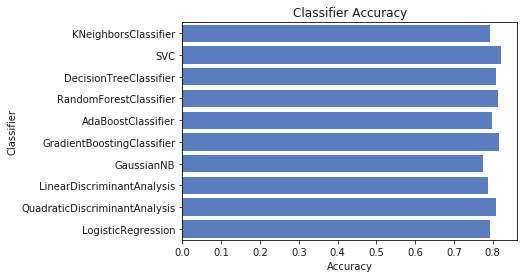

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = trainArr[:, 1:]
y = trainArr[:, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [43]:
candidate_classifier = SVC()
candidate_classifier.fit(trainArr[:, 1:], trainArr[:, 0])
result = candidate_classifier.predict(testArr)
ids = Test['PassengerId'].values

In [66]:
#print(result)
#print(ids)
submit = np.array([[PassId,res] for PassId,res in zip(ids,result)])
print(submit.flags['C_CONTIGUOUS'])
print(submit)

True
[[ 892    0]
 [ 893    1]
 [ 894    0]
 [ 895    0]
 [ 896    1]
 [ 897    0]
 [ 898    1]
 [ 899    0]
 [ 900    1]
 [ 901    0]
 [ 902    0]
 [ 903    0]
 [ 904    1]
 [ 905    0]
 [ 906    1]
 [ 907    1]
 [ 908    0]
 [ 909    0]
 [ 910    0]
 [ 911    1]
 [ 912    0]
 [ 913    1]
 [ 914    1]
 [ 915    0]
 [ 916    1]
 [ 917    0]
 [ 918    1]
 [ 919    0]
 [ 920    0]
 [ 921    0]
 [ 922    0]
 [ 923    0]
 [ 924    0]
 [ 925    0]
 [ 926    0]
 [ 927    0]
 [ 928    1]
 [ 929    1]
 [ 930    0]
 [ 931    0]
 [ 932    0]
 [ 933    0]
 [ 934    0]
 [ 935    1]
 [ 936    1]
 [ 937    0]
 [ 938    0]
 [ 939    0]
 [ 940    1]
 [ 941    0]
 [ 942    0]
 [ 943    0]
 [ 944    1]
 [ 945    1]
 [ 946    0]
 [ 947    0]
 [ 948    0]
 [ 949    0]
 [ 950    0]
 [ 951    1]
 [ 952    0]
 [ 953    0]
 [ 954    0]
 [ 955    1]
 [ 956    1]
 [ 957    1]
 [ 958    1]
 [ 959    0]
 [ 960    0]
 [ 961    1]
 [ 962    1]
 [ 963    0]
 [ 964    1]
 [ 965    0]
 [ 966    1]
 [ 967    0]
 [ 968 

In [69]:
with open("my_prediction.csv","w") as fp:
    for row in submit:
        fp.write(str(row[0]) + "," + str(row[1]) + "\n")

In [71]:
with open("random_prediction.csv","w") as fp:
    for row in submit:
        fp.write(str(row[0]) + "," + str(np.random.choice([0,1])) + "\n")

In [19]:
a = np.array([[j*10+i for i in range(0,10)] for j in range(0,10)])

In [20]:
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [21]:
a[0:,0]

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])